In [309]:
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql import Row
spark = SparkSession \
.builder \
.appName("mongodbtest1") \
.master("spark://10.1.174.144:7077")\
.config("spark.mongodb.read.uri", "mongodb://abhi_1:60000/shardDB.asofashion_2") \
.config("spark.mongodb.write.uri", "mongodb://abhi_1:60000/shardDB.asofashion_clean") \
.config('spark.jars.packages', 'org.mongodb.spark:mongo-spark-connector_2.13:10.2.2') \
.getOrCreate()

In [310]:
df = spark.read\
                 .format("mongodb")\
                 .option("connection.uri", "mongodb://abhi_1:60000/")\
                 .option("database", "shardDB")\
                 .option("collection", "asofashion_clean")\
                 .load()

In [311]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import io
from pyspark.sql.functions import percentile_approx

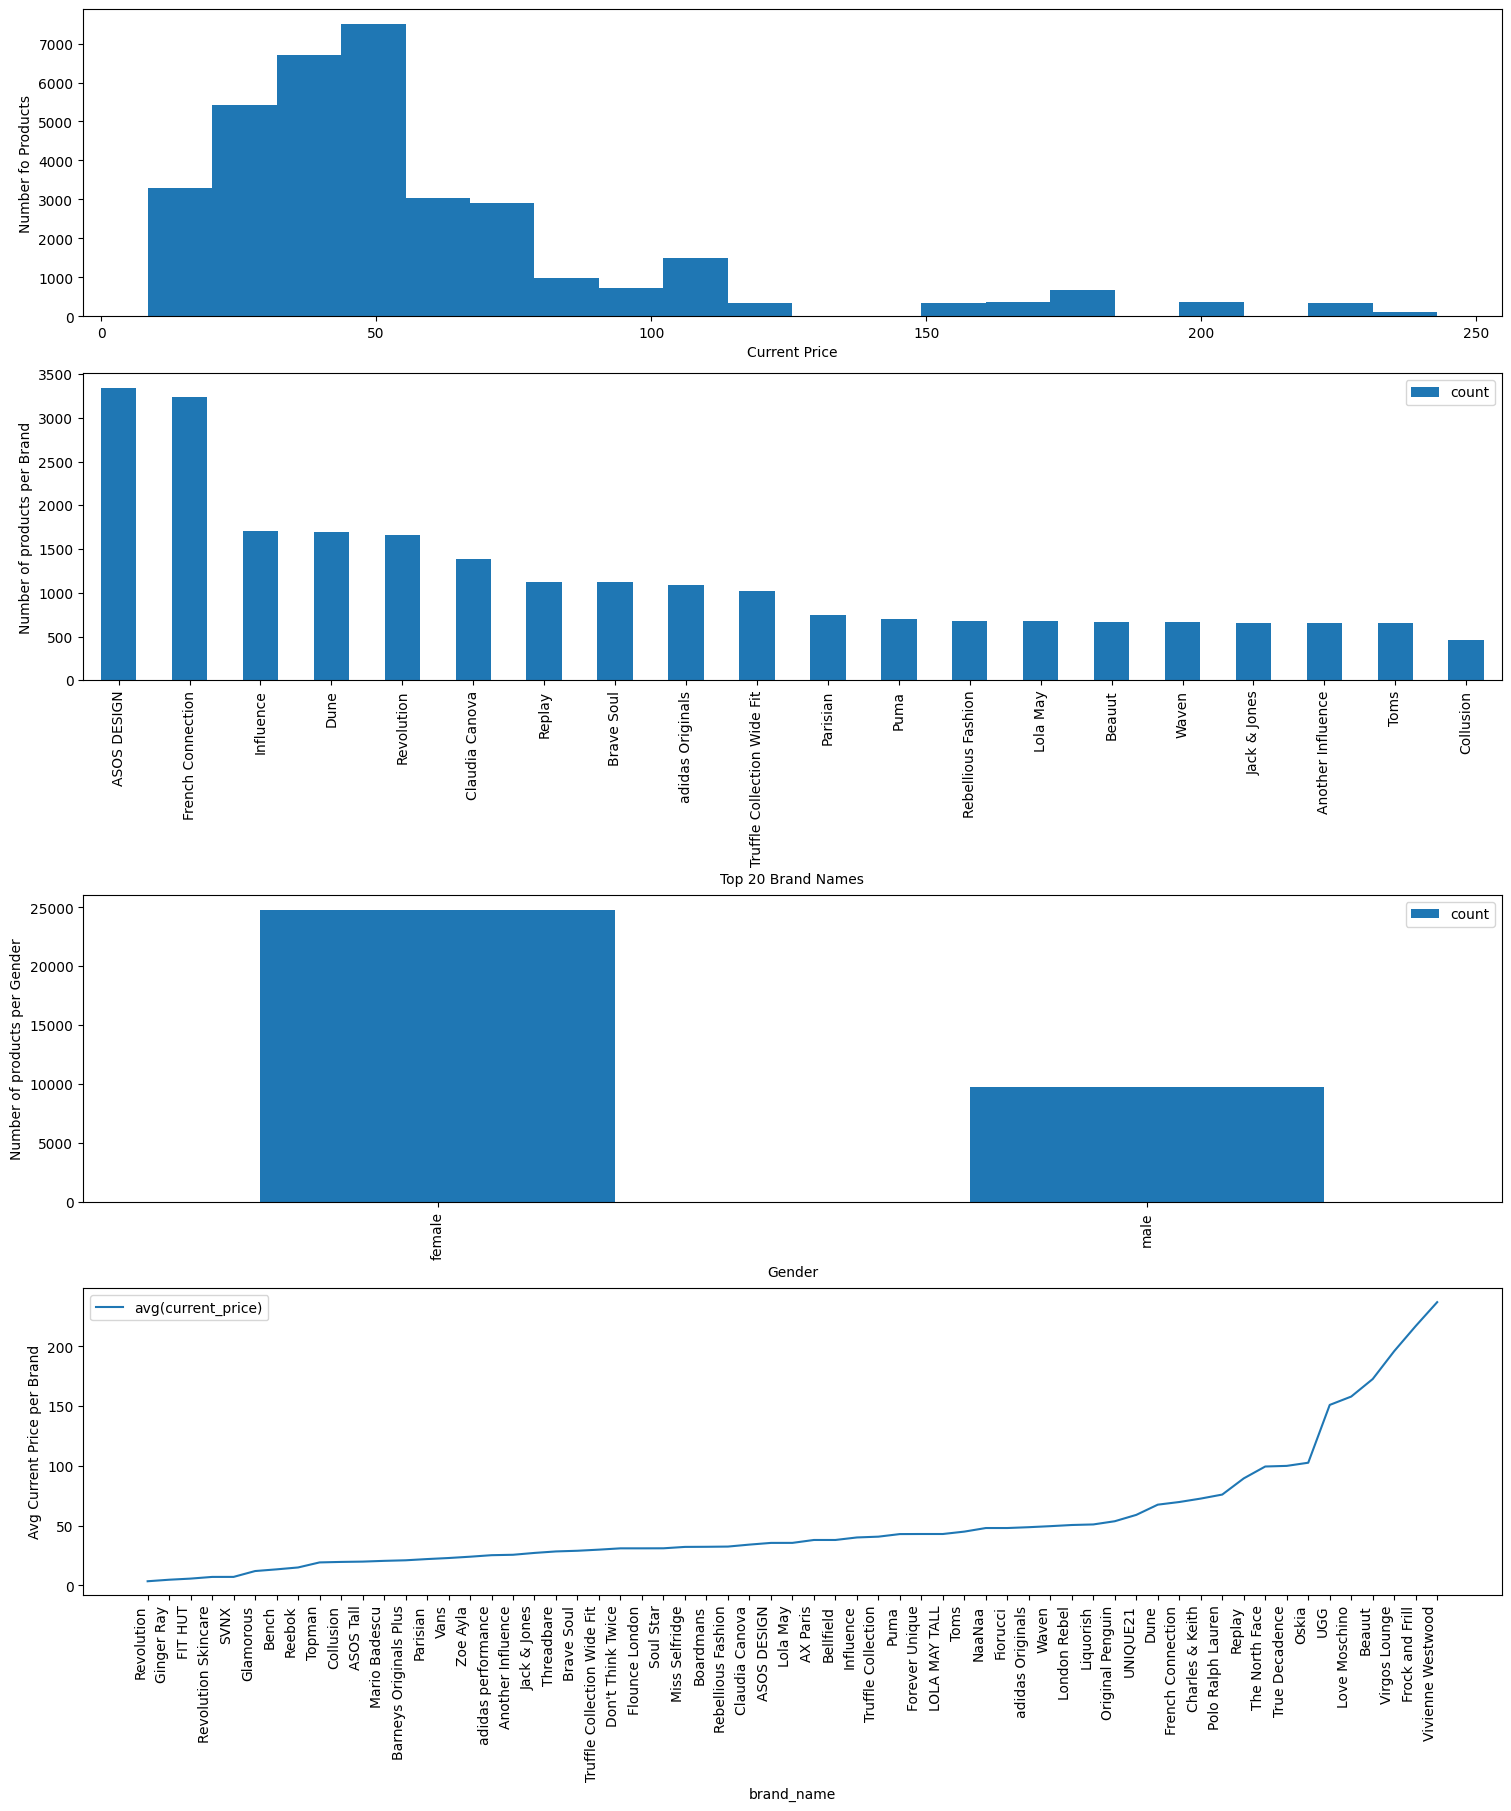

In [312]:
# gridspec = dict(hspace=1, height_ratios=[0, 1, 0.4, 3])
fig, ax = plt.subplots(nrows=4, ncols=1,figsize=(15,18),constrained_layout=True)

# Histogram in Spark 
vals = df.select("current_price").rdd.flatMap(lambda x: x).histogram(20)
width = vals[0][1] - vals[0][0]
loc = [vals[0][0] + (i+1) * width for i in range(len(vals[1]))]
ax[0].bar(loc, vals[1], width=width)
ax[0].set_xlabel("Current Price")
ax[0].set_ylabel("Number fo Products")


#Barplot in Spark
classes = df.groupBy("brand_name").count().orderBy('count', ascending=False)
pd_df = classes.limit(20).toPandas() 
pd_df.plot(kind='bar', x="brand_name", legend=True,ax=ax[1])
ax[1].set_ylabel("Number of products per Brand")
ax[1].set_xlabel("Top 20 Brand Names")


classes = df.groupBy("gender").count().orderBy('count', ascending=False)
pd_df = classes.limit(20).toPandas() 
pd_df.plot(kind='bar', x="gender", legend=True,ax=ax[2])
ax[2].set_ylabel("Number of products per Gender")
ax[2].set_xlabel("Gender")

#Lineplot in Spark
pd_df = df.groupBy("brand_name").mean("current_price").toPandas().sort_values(by='avg({})'.format("current_price"))
pd_df.plot.line("brand_name", 'avg({})'.format("current_price"), legend=True,ax=ax[3])
ax[3].set_ylabel("Avg Current Price per Brand")
ax[3].set_xticks(np.arange(pd_df.shape[0]),list(pd_df["brand_name"]),rotation=90, ha='right')

# plt.tight_layout()

bytes_image = io.BytesIO()
plt.savefig(bytes_image, format='png')
bytes_image.seek(0)
plt.show()


In [313]:
bytes_image

In [314]:
spark.stop()

In [305]:
# from flask import Flask, request
# from flask_restful import Resource, Api
# import base64

# app = Flask(__name__)
# api = Api(app)

# class Picture(Resource):
#     def get(self):

#         return ("Plot Exist"),201

# api.add_resource(Picture,"/dashboard")

# app.run(host= "10.1.174.107", port = 60010, debug = True)